# Stock Scraper Production

### About

This is the production version of the stock scraper - the goal of this program is to grab stock data in a neat data frame for insight generation. 

Current version shows moving averages.

Test version for back testing trading strategies


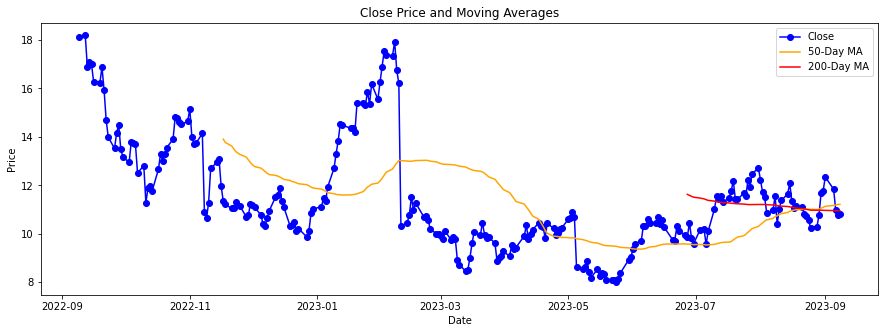

In [1]:
# Import all the libraries necessary

import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt



# Use yfinance to create a dataframe of stock price data
stock_symbol = 'LYFT'
today = datetime.today().strftime('%Y-%m-%d')
stock_data = yf.download(stock_symbol, start=datetime.today()-timedelta(days=365), end=today, progress=False)
        # datetime.today().strftime('%Y-%m-%d')
close_prices = stock_data['Close']
dates = close_prices.index
df = pd.DataFrame({'date': dates, 'close': close_prices}).reset_index(drop=True)

# Create moving averages from the data frame and reset index for most recent
df['ma20'] = df['close'].rolling(window=20).mean()
df['ma50'] = df['close'].rolling(window=50).mean()
df['ma200'] = df['close'].rolling(window=200).mean()

df = df.sort_values(by='date',ascending=False).reset_index(drop=True)

# Plot the price with 200 MA with hidden MA's in case you want to see different
plt.figure(figsize=(15,5))

plt.plot(df['date'], df['close'], marker='o', label='Close', color='blue')
#plt.plot(df['Date'], df['ma20'], label='20-Day MA', color='green')
plt.plot(df['date'], df['ma50'], label='50-Day MA', color='orange')
plt.plot(df['date'], df['ma200'], label='200-Day MA', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and Moving Averages')
plt.legend()

plt.show()

## Additional Charts

Now that we have the dataframe and the summary visualization, here are more visuals.
###### 

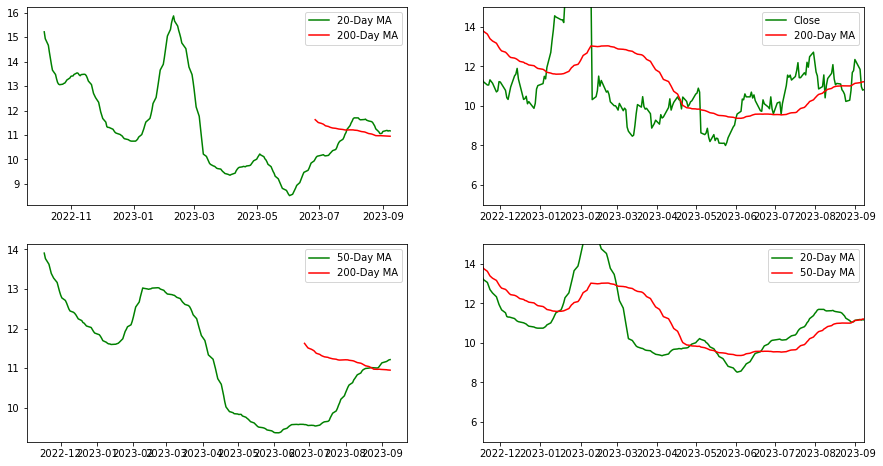

In [2]:
figure, axis = plt.subplots(2, 2, figsize=(15, 8))

# 20 MA and 200 MA
axis[0,0].plot(df['date'], df['ma20'], label='20-Day MA', color='green')
axis[0,0].plot(df['date'], df['ma200'], label='200-Day MA', color='red')
axis[0,0].legend()

# 50 MA and 200 MA
axis[1,0].plot(df['date'], df['ma50'], label='50-Day MA', color='green')
axis[1,0].plot(df['date'], df['ma200'], label='200-Day MA', color='red')
axis[1,0].legend()

# 20 MA and 50 MA
axis[1,1].plot(df['date'], df['ma20'], label='20-Day MA', color='green')
axis[1,1].plot(df['date'], df['ma50'], label='50-Day MA', color='red')
axis[1,1].set_xlim(df.loc[200,'date'],df.loc[0,'date'])
axis[1,1].set_ylim(5,15)
axis[1,1].legend()

# Close and 200 MA
axis[0,1].plot(df['date'], df['close'], label='Close', color='green')
axis[0,1].plot(df['date'], df['ma50'], label='200-Day MA', color='red')
axis[0,1].set_xlim(df.loc[200,'date'],df.loc[0,'date'])
axis[0,1].set_ylim(5,15)
axis[0,1].legend()

# Combine all the operations and display
plt.show()

In [3]:
def strategy(df,low,high):
    ### The df will be the cleaned price data with moving averages. the low and high are column names of moving averages
    ### strategy(df,close,ma20)
    
    signal = low+high
    df[signal] =0
    
    for i in range(1, len(df)):
        if df[low][i] > df[high][i] and df[low][i - 1] <= df[high][i - 1]:
            df.loc[i,signal] = -1 
        elif df[low][i] < df[high][i] and df[low][i - 1] >= df[high][i - 1]:
            df.loc[i,signal] = 1 
    
    if df[signal].iloc[-1] == -1:
        df.drop(df.index[-1], inplace=True)

    df = df[df[signal]!=0][['date','close',signal]].reset_index(drop=True)  
    
    for i in range(0,len(df)):
        if df.loc[i,signal] == -1:
            buy = df.loc[i+1,'close']
            sell = df.loc[i,'close']
            df.loc[i,'return'] = ((sell-buy)/buy) + 1
        else:
            df.loc[i,'return'] = ""
    total_return = df.loc[df[signal]==-1,'return'].prod()
    return df,total_return

print(strategy(df,'close','ma50')[1])
strategy(df,'close','ma50')[0]

2.247826411841401


,date,close,closema50,return
0,2023-09-05,11.840000,-1,1.09935
1,2023-08-29,10.770000,1,
2,2023-08-21,11.100000,-1,1.067308
3,2023-08-09,10.400000,1,
4,2023-08-08,11.560000,-1,1.235043
5,2023-06-01,9.360000,1,
6,2023-05-04,10.690000,-1,1.086382
7,2023-04-20,9.840000,1,
8,2023-02-09,16.219999,-1,1.427817
9,2023-01-05,11.360000,1,
